First 5 rows of the medical insurance data:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Basic Statistics:


,bmi,charges,age
count,1338.000000,1338.000000,1338.000000
mean,30.663397,13270.422265,39.207025
std,6.098187,12110.011237,14.049960
min,15.960000,1121.873900,18.000000
25%,26.296250,4740.287150,27.000000
50%,30.400000,9382.033000,39.000000
75%,34.693750,16639.912515,51.000000
max,53.130000,63770.428010,64.000000


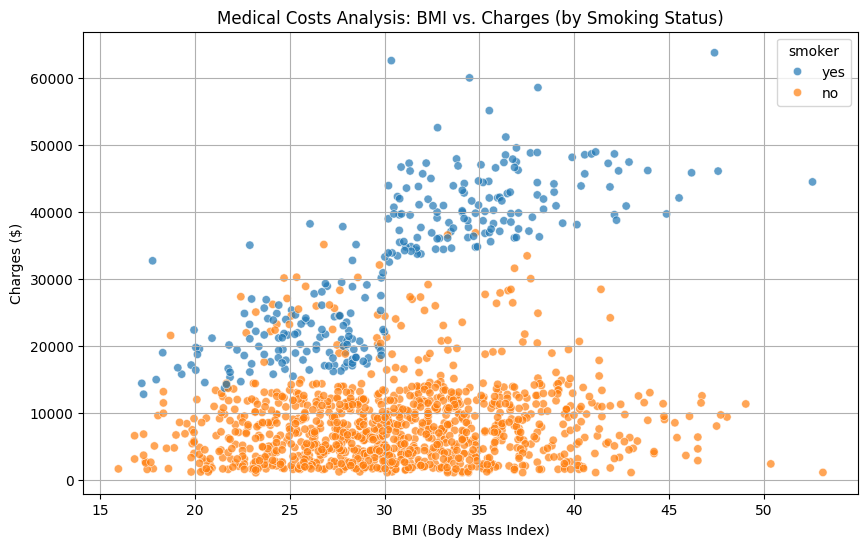

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# --- 1. Load the data (טעינת הנתונים) ---
# טעינת דאטה של ביטוח רפואי (מכיל נתוני גיל, BMI, עישון ועלויות)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# הצגת 5 השורות הראשונות
print("First 5 rows of the medical insurance data:")
display(df.head())

# --- 2. Save the file locally (שמירת הקובץ למחשב) ---
# הקובץ יישמר בשם insurance.csv - אותו תעלה לגיטהאב
df.to_csv('insurance.csv', index=False)
files.download('insurance.csv')

# --- 3. Process the data (עיבוד נתונים) ---
# נבדוק נתונים סטטיסטיים בסיסיים על ה-BMI והעלויות
print("\nBasic Statistics:")
display(df[['bmi', 'charges', 'age']].describe())

# --- 4. Visualize (יצירת גרף) ---
# יצירת גרף שמראה את הקשר בין ה-BMI (מדד מסת גוף) לבין העלויות הרפואיות
# הצבעים (hue) יחלקו את האנשים למעשנים ולא מעשנים
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)

plt.title('Medical Costs Analysis: BMI vs. Charges (by Smoking Status)')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Charges ($)')
plt.grid(True)
plt.show()

/tmp/ipython-input-694205715.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='smoker', y='charges', palette=['orange', 'steelblue'], ci=None)
/tmp/ipython-input-694205715.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoker', y='charges', palette=['orange', 'steelblue'], ci=None)


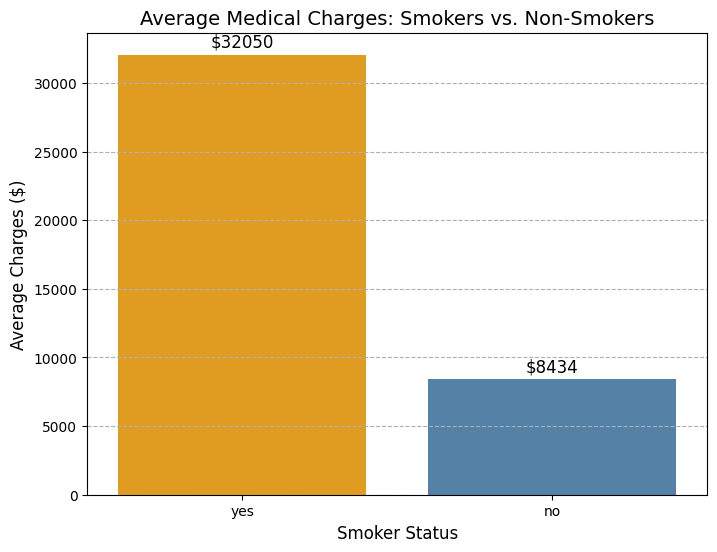

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the data (טעינת הנתונים) ---
# טעינת דאטה של ביטוח רפואי (אותו קובץ כמו מקודם)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# --- 2. Visualize (יצירת גרף עמודות) ---
# יצירת גרף עמודות שישווה את ממוצע העלויות בין מעשנים ללא מעשנים
plt.figure(figsize=(8, 6))

# שימוש ב-barplot. הוא מחשב אוטומטית את הממוצע של ציר ה-y (charges) עבור כל קטגוריה בציר ה-x (smoker)
# הוספנו את הפרמטר 'ci=None' כדי להסיר את קווי השגיאה (Error Bars) למראה נקי יותר
sns.barplot(data=df, x='smoker', y='charges', palette=['orange', 'steelblue'], ci=None)

# --- 3. Customize the Plot (התאמת הגרף) ---
plt.title('Average Medical Charges: Smokers vs. Non-Smokers', fontsize=14)
plt.xlabel('Smoker Status', fontsize=12)
plt.ylabel('Average Charges ($)', fontsize=12)
plt.grid(axis='y', linestyle='--') # הוספת רשת אופקית לקריאה קלה יותר של הערכים

# הוספת טקסט עם ערך הממוצע מעל כל עמודה
# (זהו קטע קוד קצת יותר מתקדם, אך מוסיף המון לבהירות הגרף)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'${p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12, color='black')

plt.show()